In [25]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [26]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 데이터 준비

In [27]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000,
                    shuffle=True,
                    noise=0.05,
                    random_state=0,
                    factor=0.5)

df = pd.DataFrame(X, columns=['feature1', 'feature2'])

df.head()

,feature1,feature2
0,0.519781,-0.015981
1,-0.057719,-0.420279
2,-0.805155,-0.662227
3,0.316549,0.312730
4,-0.304804,0.407563


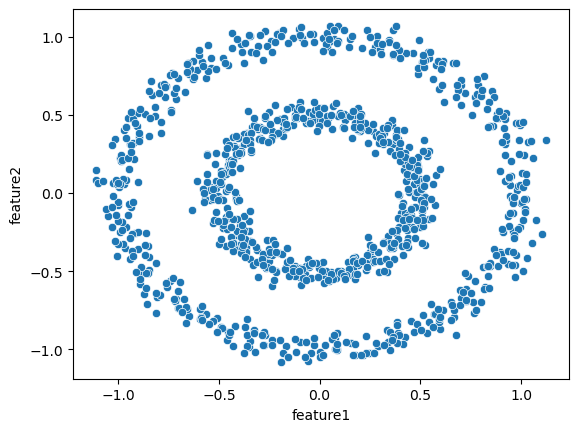

In [28]:
sns.scatterplot(data=df, x='feature1', y='feature2')
plt.show()

### k-means clustergin

In [29]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
df['kmeans'] = km.fit_predict(X)

df.head()

c:\Users\chopi\miniconda3\envs\aischool8\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


,feature1,feature2,kmeans
0,0.519781,-0.015981,1
1,-0.057719,-0.420279,0
2,-0.805155,-0.662227,0
3,0.316549,0.312730,1
4,-0.304804,0.407563,1


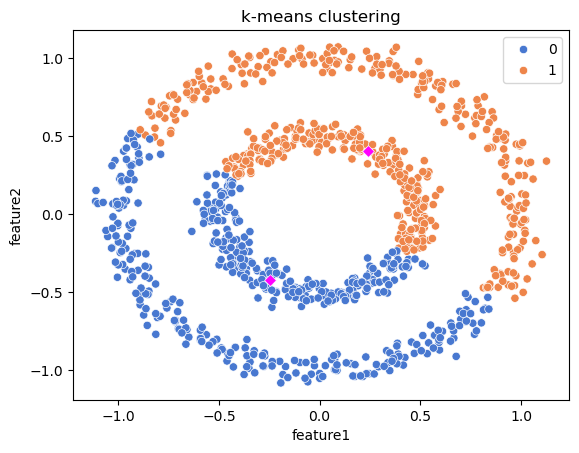

In [30]:
sns.scatterplot(df, x='feature1', y='feature2', hue='kmeans', palette='muted')
sns.scatterplot(x=km.cluster_centers_[:,0], y=km.cluster_centers_[:,1], 
                marker='D', color='magenta')
plt.title('k-means clustering')
plt.show()

### DBSCAN

In [31]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.2,
                min_samples=10)
df['dbscan'] = dbscan.fit_predict(X)
df.head()

,feature1,feature2,kmeans,dbscan
0,0.519781,-0.015981,1,0
1,-0.057719,-0.420279,0,0
2,-0.805155,-0.662227,0,1
3,0.316549,0.312730,1,0
4,-0.304804,0.407563,1,0


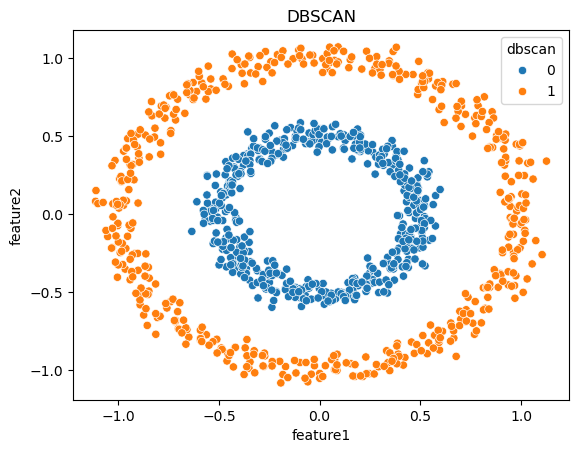

In [32]:
sns.scatterplot(df, x='feature1', y='feature2', hue='dbscan')
plt.title('DBSCAN')
plt.show()